In [1]:
import numpy as np

from nfvm.mesh.triangleMesh import TriangleMesh
from nfvm.field.volField import volScalarField
import nfvm.fvm as fvm

import matplotlib.pyplot as plt
from tqdm import tqdm

# 热扩散问题：隐式Euler时间项
## 定义一个网格场

从文件 ../../resources/laplacian/heatCavity_tri/mesh/heatCavity.nfvm 加载网格信息 ...
文件版本：0.1.0
初始化 TriangleMesh ...
初始化 TriangleMesh 成功


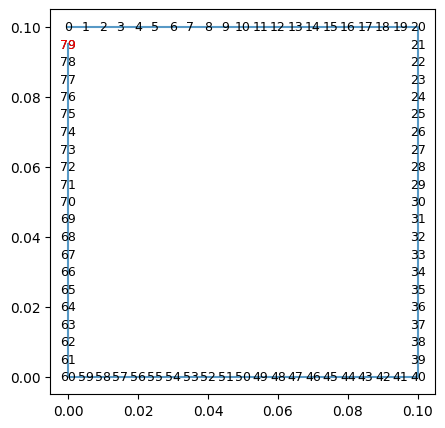

In [2]:
mesh = TriangleMesh.load("../../resources/laplacian/heatCavity_tri/mesh/heatCavity.nfvm")
mesh.showBoundary(pause=False)

## 构造一个温度场

In [3]:
# 构造一个边界条
k, b = np.ones(80), np.zeros(80)

# 20-40温度为310 
k[:20] = 0.0
b[:20] = 310.0
# 60-80温度为300，
k[40:60] = 0.0
b[40:60] = 300.0
# 0-20&40-60为绝热条件（0梯度条件），默认的 k=1.0, b=0.0就是0梯度

In [4]:
# 构造一个温度场并指定初始值

CN = mesh.cn
T = volScalarField("T", mesh, value=np.ones(CN)*300.0, boundary_dict={'k': k, 'b': b})

## 使用拉普拉斯算子构造稀疏矩阵

In [5]:
dt = 1.0 
iteration:int = 10

T_eveyIter_cell_0 = np.zeros(iteration)

In [6]:
for i in tqdm(range(iteration)):
    mat = fvm.ddt(T, dt=1.0) + fvm.Laplacian(T, 4e-5)
    x = mat.solve()
    T.value = x
    T_eveyIter_cell_0[i] = T[0]
    # T.writeVTK()
    

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:05<00:00,  1.94it/s]


In [7]:
X = mesh.points[:,0]
Y = mesh.points[:,1]
triangles = mesh.cells 
color = T.value

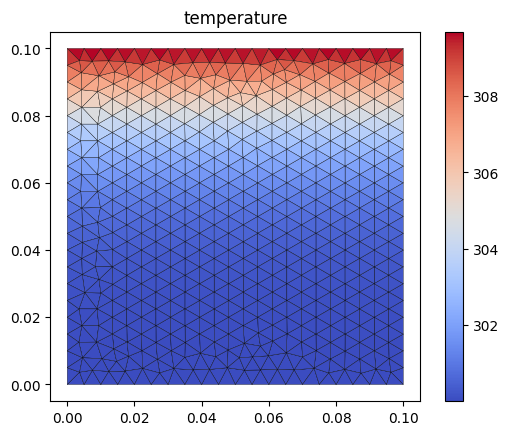

In [8]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
tpc = ax.tripcolor(X, Y, triangles, facecolors=color, cmap='coolwarm',  edgecolors='k')
fig.colorbar(tpc)
ax.set_title('temperature')

plt.show()

## 与OpenFoam对比

In [9]:
# T data of cell 0 from OpenFoam10
T_foam = [302.89, 304.704, 305.719, 306.337, 306.751,
        307.052, 307.283, 307.466, 307.617, 307.744]

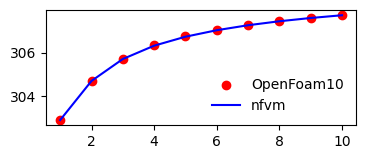

In [10]:
it = np.linspace(1, iteration, iteration)

plt.figure(figsize=(4,1.5))

plt.scatter(it, T_foam, color='r', label="OpenFoam10")
plt.plot(it, T_eveyIter_cell_0, color='b', label='nfvm')

plt.legend(frameon=False)
plt.show()